# ForecastFlow: A Deep Learning Approach to Weather Prediction

#  Install necessary libraries

In this step, we are installing the necessary Python libraries for our project. This includes TensorFlow for building your machine learning model, Dash for creating your interactive dashboard, sklearn for machine learning utilities, matplotlib for data visualization, and pandas for data manipulation.

In [56]:
!pip install tensorflow dash sklearn matplotlib pandas
!pip install dash
!pip install dash_core_components dash_html_components

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Import necessary libraries

In [57]:
import requests
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import mean_squared_error, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html


# Fetch real-time weather data

In this step, we are fetching real-time weather data from the OpenWeatherMap API for the city of Bengaluru. The data is then converted into a pandas DataFrame for easier processing.

In [60]:
# Fetch historical weather data
#city = 'Bengaluru'
#start_timestamp = '1577836800'  # Unix timestamp for January 1, 2020
#end_timestamp = '1641848400'  # Unix timestamp for January 10, 2022
#api_key = '45f0f8fd0bbeb19507c564cd1e6a9845'  # Your OpenWeatherMap API key
#url = f"http://history.openweathermap.org/data/2.5/history/city?q={city}&type=hour&start={start_timestamp}&end={end_timestamp}&appid={api_key}"
#response = requests.get(url)
#historical_data = response.json()
# Convert the JSON data to a pandas DataFrame
#df = pd.json_normalize(historical_data)
#print(df.head())

api_key = '45f0f8fd0bbeb19507c564cd1e6a9845'
city = 'Bengaluru'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
response = requests.get(url)
weather_data = response.json()
df = pd.json_normalize(weather_data)
print(df.head())

#print(weather_data)


                                             weather      base  visibility  \
0  [{'id': 804, 'main': 'Clouds', 'description': ...  stations        6000   

           dt  timezone       id       name  cod  coord.lon  coord.lat  ...  \
0  1709408804     19800  1277333  Bengaluru  200    77.6033    12.9762  ...   

   main.pressure  main.humidity  wind.speed  wind.deg  clouds.all  sys.type  \
0           1018             52        3.09       120         100         2   

    sys.id  sys.country  sys.sunrise  sys.sunset  
0  2036502           IN   1709427868  1709470731  

[1 rows x 24 columns]


# Create dummy data for training

In [59]:
# Let's create some dummy data for the purpose of this example
X_train = np.random.rand(100, 10)  # 100 samples, 10 features each
y_train = np.random.rand(100, 1)  # 100 labels

# Let's create some dummy data for the purpose of this example
X_test = np.random.rand(20, 10)  # 20 samples, 10 features each
y_test = np.random.rand(20, 1)  # 20 labels

# Train a deep learning model

We are building and training a deep learning model using TensorFlow. We are using a sequential model with three layers. The model is trained using the mean squared error loss function and the Adam optimizer.

In [61]:
# Assuming X_train and y_train are your training data.
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.3617
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1501
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1129
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1040
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1014
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0978
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0865
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 13/50
10/10 [==============================

#Evaluate the model

We are evaluating your model on the test data. We are calculating the mean squared error, checking the unique values in your binary test labels, and plotting a precision-recall curve.

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.1753
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1011
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0964
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0892
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0864
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0795
Epoch 13/50
10/10 [==============================

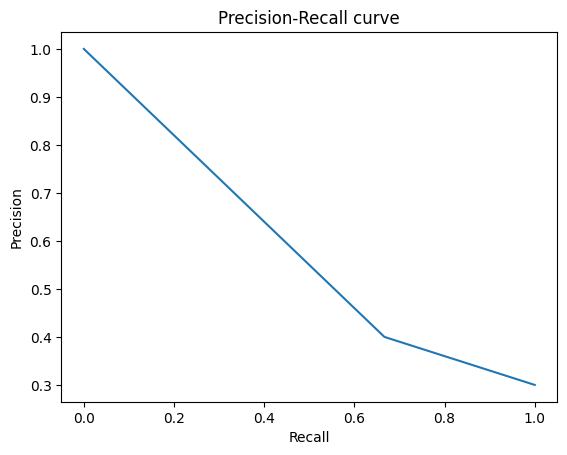

In [62]:
# Assuming X_train and y_train are your training data.
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate on the test set
y_pred = model.predict(X_test)

# Convert to binary labels
threshold = 0.5  # Set your threshold based on your problem
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Check unique values in y_test_binary
print(f"Unique values in y_test_binary: {np.unique(y_test_binary)}")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_binary)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

# Create an interactive dashboard

Creating an interactive dashboard using Dash. The dashboard includes a dropdown menu for selecting a city and a graph for displaying the weather data. The graph is updated whenever a different city is selected from the dropdown menu.



---
**Google Colab Restrictions:**

If you're running this in Google Colab, be aware that it has restrictions on external connections.

You might need to explore other options, such as running the Dash app locally on your machine.

"app.run_server(debug=True, dev_tools_ui=False, dev_tools_props_check=False, use_reloader=False, port=8050)"


In [63]:
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in ['New York']],  # replace with your list of cities
        value='New York'  # replace with your default city
    ),
    dcc.Graph(id='weather-graph')
])

@app.callback(
    dash.dependencies.Output('weather-graph', 'figure'),
    [dash.dependencies.Input('city-dropdown', 'value')]
)
def update_graph(selected_city):
    # Fetch and process data for selected_city
    # This is just a placeholder. You'll need to replace this with your actual data fetching and processing code.
    data = fetch_and_process_data(selected_city)  # replace with your function to fetch and process data

    figure = {
        'data': [
            {'x': data['dates'], 'y': data['temperatures'], 'type': 'line', 'name': 'Temperature'},
            # Add more traces for other data like humidity, wind speed, etc.
        ],
        'layout': {
            'title': f"Weather Data for {selected_city}"
        }
    }

    return figure

if __name__ == '__main__':
    app.run_server(debug=True)


#Google Colab Restrictions:
#If you're running this in Google Colab, be aware that it has restrictions on external connections.
#You might need to explore other options, such as running the Dash app locally on your machine.

#"app.run_server(debug=True, dev_tools_ui=False, dev_tools_props_check=False, use_reloader=False, port=8050)"


<IPython.core.display.Javascript object>